Load Datasets 

In [ ]:
import pandas as pd 

data_full = pd.read_csv('merged_data.csv')  #read full dataset 
data_5k = pd.read_csv('merged_data_5k.csv')    #read dataset containing 5k genes 

print(data_full.head)
print("full dataset shape: ", data_full.shape)

print(data_5k.head)
print("shortened dataset shape: ", data_5k.shape)


<bound method NDFrame.head of                   gene_ID               Sample  FPKM  Cancer_Type_Breast  \
0         ENSG00000000003   3-Breast-Her2-ampl     0                True   
1         ENSG00000000005   3-Breast-Her2-ampl     0                True   
2         ENSG00000000419   3-Breast-Her2-ampl    44                True   
3         ENSG00000000457   3-Breast-Her2-ampl    26                True   
4         ENSG00000000460   3-Breast-Her2-ampl    81                True   
...                   ...                  ...   ...                 ...   
16454755  ENSG00000273487  MGH-NSCLC-L65-TR523     0               False   
16454756  ENSG00000273488  MGH-NSCLC-L65-TR523     0               False   
16454757  ENSG00000273489  MGH-NSCLC-L65-TR523     0               False   
16454758  ENSG00000273492  MGH-NSCLC-L65-TR523     0               False   
16454759  ENSG00000273493  MGH-NSCLC-L65-TR523     0               False   

          Cancer_Type_CRC  Cancer_Type_GBM  Cancer_Type_H

In [ ]:
import re 
# cancer_types = data_full['Sample'].unique()
# print("Cancer types present in the dataset:", cancer_types)

def extract_main_cancer_type(sample_name):
    # Use regex to capture main keywords without prefixes or suffixes
    match = re.search(r'(?<![A-Za-z0-9])(?:Breast|Liver|CRC|GBM|HD|Chol|Lung|Pancr|Panc|Control|NSCLC)(?![A-Za-z0-9])', sample_name, re.IGNORECASE)
    if match:
        return match.group(0).capitalize()  # Return the matched cancer type with proper capitalization
    else:
        return "Unknown"  # Label for unidentified types

# Apply the function to the 'Sample' column
data_full['Cancer_Type_Simplified'] = data_full['Sample'].apply(extract_main_cancer_type)

# Get unique cancer types
unique_cancer_types = data_full['Cancer_Type_Simplified'].unique()
print("Unique cancer types present in the dataset:", unique_cancer_types)

Unique cancer types present in the dataset: ['3-Breast-Her2-ampl' '8-Breast-WT' '10-Breast-Her2-ampl' 'Breast'
 '15-Breast-Her2-ampl' '16-Breast-WT' '21-Breast-WT' '33-Breast-Her2-ampl'
 '42-Breast-Her2-ampl' '48-Breast-WT' '50-Breast-WT' '55-Breast-WT' 'Type'
 '59-Breast-WT' 'ALK' '97-Breast-Her2-ampl' '292-Liver-KRAS'
 '316-Liver-KRAS' '341-Liver-WT' '376-Liver-WT' '379-Liver-WT' 'Chol' 'VU'
 '329-CRC-KRAS' '342-CRC-KRAS' '354-CRC-WT' '356-CRC-WT' 'CRC'
 '374-CRC-WT' '378-CRC-WT' '420-CRC-WT' '429-CRC-WT' '453-CRC-KRAS'
 '462-CRC-KRAS' '466-CRC-KRAS' '474-CRC-WT' '497-CRC-KRAS' '504-CRC-WT'
 '527-CRC-WT' '543-CRC-KRAS' '546-CRC-KRAS' '548-CRC-KRAS' '556-CRC-WT'
 'GBM' 'HD' 'Control' '297-Liver-WT' '366-Liver-WT' 'Lung'
 '286-Pancr-286-WT' '314-Pancr-WT' '327-Pancr-KRAS' '328-Pancr-WT'
 '331-Pancr-WT' 'Panc' '367-Pancr-KRAS' '369-Pancr-KRAS' '371-Pancr-KRAS'
 '380-Pancr-KRAS' '382-Pancr-KRAS' '387-Pancr-WT' '388-Pancr-WT'
 '389-Pancr-WT' '390-Pancr-KRAS' '391-Pancr-KRAS' '431-Pancr-WT

Visualizing Dataset 

(285, 57736)
<bound method NDFrame.head of gene_ID              ENSG00000000003  ENSG00000000005  ENSG00000000419  \
Sample                                                                   
10-Breast-Her2-ampl                0                0               16   
15-Breast-Her2-ampl               17                0                9   
16-Breast-WT                       0                0                0   
21-Breast-WT                       0                0              139   
286-Pancr-286-WT                   0                0               60   
...                              ...              ...              ...   
VU456-1-GBM-WT                     0                0               16   
VU468-1-GBM-WT                     0                0               19   
Vumc-NSCLC-49                      0                0               14   
Vumc-NSCLC-57                      9                0               25   
Vumc-NSCLC-59                      0                0               4

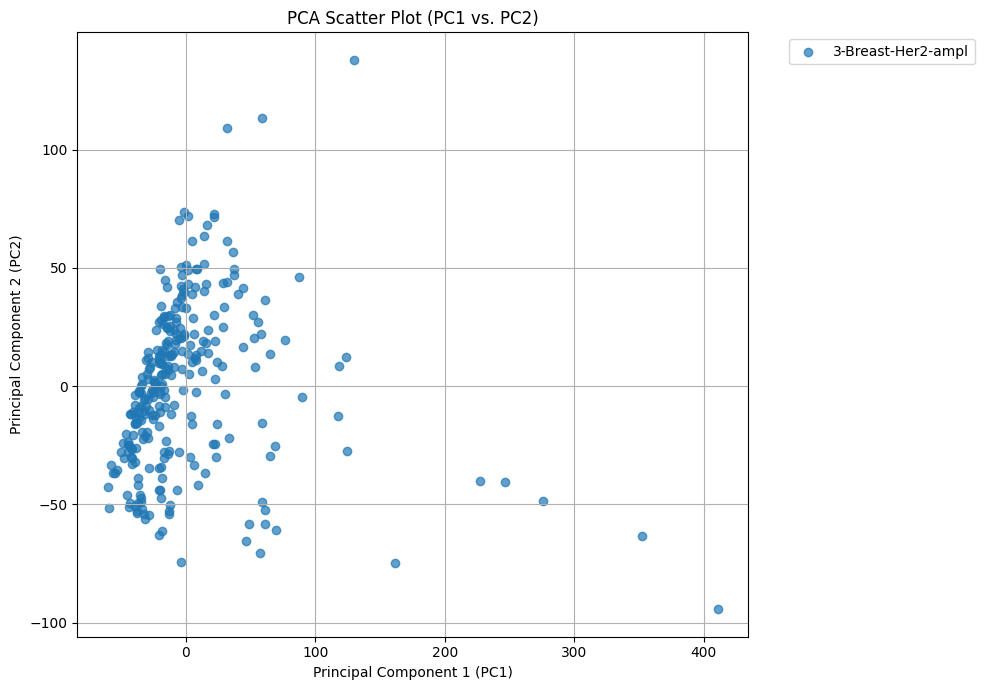

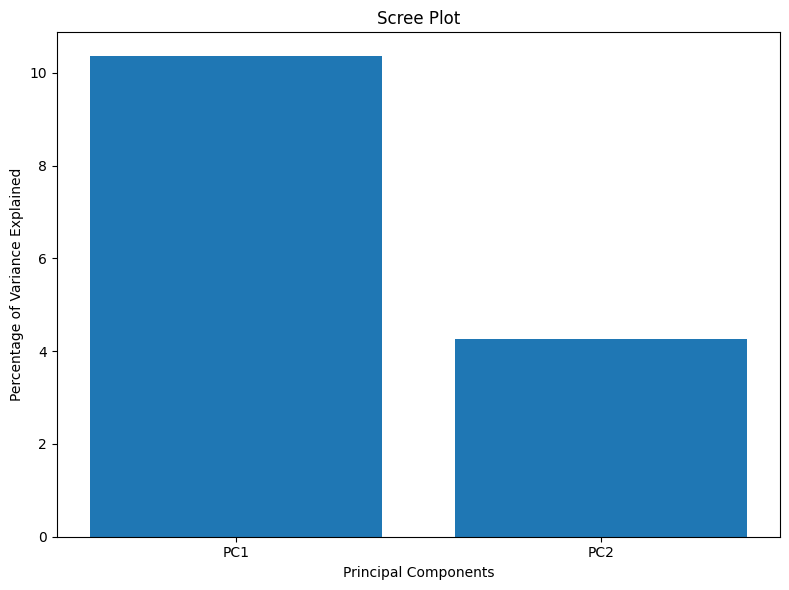

In [17]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# List of cancer types in the dataset
cancer_type_columns = [
    'Cancer_Type_Breast', 'Cancer_Type_CRC', 'Cancer_Type_GBM', 'Cancer_Type_HC', 
    'Cancer_Type_Hepatobiliary', 'Cancer_Type_Lung', 'Cancer_Type_Pancreas'
]

# Select only numerical columns (gene expression values)
numerical_data = data_full.pivot(index='Sample', columns='gene_ID', values='FPKM')

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
print(numerical_data.shape)
print(numerical_data.head)
print(scaled_data.shape)


# Apply PCA with a fixed number of components (at least 2 for visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Sample'] = data_full['Sample']  # Add sample labels

# Plot PCA Scatter Plot (PC1 vs. PC2)
plt.figure(figsize=(10, 7))
for sample in pca_df['Sample'].unique():
    subset = pca_df[pca_df['Sample'] == sample]
    plt.scatter(subset['PC1'], subset['PC2'], label=sample, alpha=0.7)

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Scatter Plot (PC1 vs. PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Scree Plot
plt.figure(figsize=(8, 6))
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage
plt.bar(range(1, len(explained_variance) + 1), explained_variance, tick_label=['PC1', 'PC2'])
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Variance Explained")
plt.title("Scree Plot")
plt.tight_layout()
plt.show()

